# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [54]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [56]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

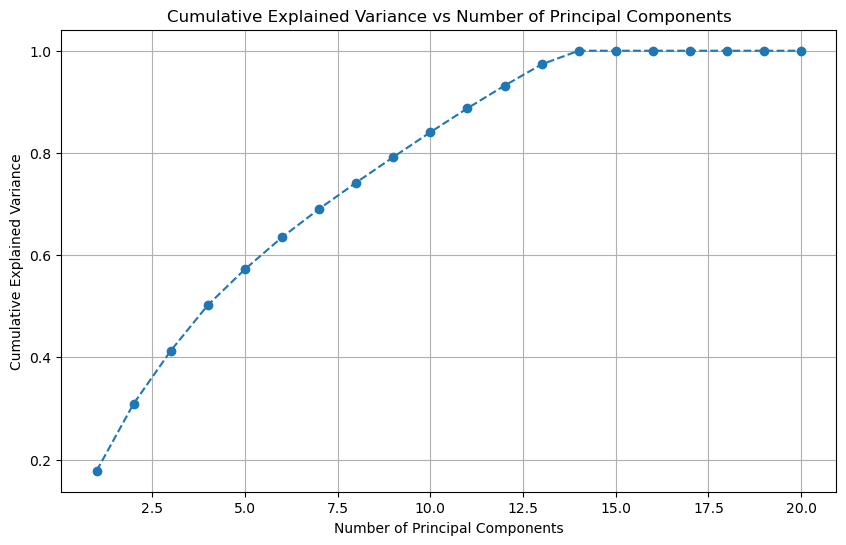

Number of components to reach 95% variance: 13


In [59]:
# insert code here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Find the number of components needed to explain 90% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to reach 95% variance: {n_components_95}")



> ## PCA Analysis Summary

We performed Principal Component Analysis (PCA) on the scaled training dataset to evaluate the cumulative explained variance.

- From the cumulative variance plot, we observe that **13 principal components** are sufficient to explain at least **95% of the total variance**.
- After this point, the curve flattens, indicating that additional components contribute little extra information.

Recommendation

Based on the analysis, we recommend reducing the dataset to **13 principal components**.  
This will:
- Preserve most of the important information,
- Improve model training speed and efficiency,
- Reduce the risk of overfitting.

Thus, selecting **13 components** provides a good balance between dimensionality reduction and retaining valuable data structure.


<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [63]:
# Insert code here
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))  # relative frequencies


target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64
target
0.0    0.496000
2.0    0.253333
1.0    0.250667
Name: proportion, dtype: float64



> Macro-averaged F1 score would be the best primary metric here, because it balances precision and recall across all classes.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=123)
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Weighted): {precision:.4f}')
print(f'Recall (Weighted): {recall:.4f}')


Accuracy: 0.7033
Precision (Weighted): 0.7040
Recall (Weighted): 0.7033


> The logistic regression model achieved an accuracy of 70.33%, with precision and recall both around 70.4%, indicating a balanced performance across all classes. These results suggest the model is handling the dataset well, without significant bias toward any particular class, but there is room for improvement, especially if the data is imbalanced.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [69]:
from sklearn.pipeline import Pipeline

# Split the data into features and target
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create a pipeline with StandardScaler, PCA, and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Scale the data
    ('pca', PCA(n_components=0.95)),   # PCA to reduce dimensions to explain 95% variance
    ('logreg', LogisticRegression(max_iter=1000, random_state=123)) # Logistic Regression model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy, precision, and recall for the test data
accuracy_pca = accuracy_score(y_test, y_pred)
precision_pca = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_pca = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy (PCA): {accuracy_pca:.4f}')
print(f'Precision (Weighted) (PCA): {precision_pca:.4f}')
print(f'Recall (Weighted) (PCA): {recall_pca:.4f}')


Accuracy (PCA): 0.7100
Precision (Weighted) (PCA): 0.7091
Recall (Weighted) (PCA): 0.7100


1. The PCA-enhanced logistic regression model performs slightly better than the original logistic regression model, as shown by the small improvements in accuracy, precision, and recall.

2. While the difference is not huge, using PCA helps simplify the model and remove unnecessary features, which generally leads to better generalization, especially with a large number of features.

3. No drastic improvement was observed, suggesting that the original model was already fairly well-optimized, and PCA only provided a slight boost.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into features and target
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Decision Tree model
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)
dtree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test_scaled)

# Calculate accuracy, precision, and recall for the test data
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted', zero_division=0)
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy (Decision Tree): {accuracy_dtree:.4f}')
print(f'Precision (Weighted) (Decision Tree): {precision_dtree:.4f}')
print(f'Recall (Weighted) (Decision Tree): {recall_dtree:.4f}')


Accuracy (Decision Tree): 0.7133
Precision (Weighted) (Decision Tree): 0.7112
Recall (Weighted) (Decision Tree): 0.7133


The decision tree model performs slightly better than both logistic regression models on all three evaluation metrics: accuracy, precision, and recall, which captures non-linear relationships better than logistic regression, explaining the slight performance improvement.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [76]:
# Split the data into features and target
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train the Decision Tree model
dtree_pca = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)
dtree_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_dtree_pca = dtree_pca.predict(X_test_pca)

# Calculate accuracy, precision, and recall for the test data
accuracy_dtree_pca = accuracy_score(y_test, y_pred_dtree_pca)
precision_dtree_pca = precision_score(y_test, y_pred_dtree_pca, average='weighted', zero_division=0)
recall_dtree_pca = recall_score(y_test, y_pred_dtree_pca, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy (Decision Tree with PCA): {accuracy_dtree_pca:.4f}')
print(f'Precision (Weighted) (Decision Tree with PCA): {precision_dtree_pca:.4f}')
print(f'Recall (Weighted) (Decision Tree with PCA): {recall_dtree_pca:.4f}')


Accuracy (Decision Tree with PCA): 0.6533
Precision (Weighted) (Decision Tree with PCA): 0.6478
Recall (Weighted) (Decision Tree with PCA): 0.6533


Conclusion:
1. PCA with Decision Tree may not have performed better than other models in this case. It is possible that the dataset's complexity or the relationships between features require a more nuanced approach that doesn't rely on PCA.

2. Recommendation: While PCA is useful for reducing dimensionality and removing noise, in this case, it may not have been beneficial for this specific model and dataset. Maybe later we could try adjusting the number of components retained in PCA or test other models to see if they perform better. Additionally, tuning hyperparameters of the decision tree might help improve performance.